<a href="https://colab.research.google.com/github/Tofucs/FitFinder/blob/main/fashionmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import random
import numpy as np
import pandas as pd
import tensorflow as tf

random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()





29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


<function matplotlib.pyplot.show(close=None, block=None)>

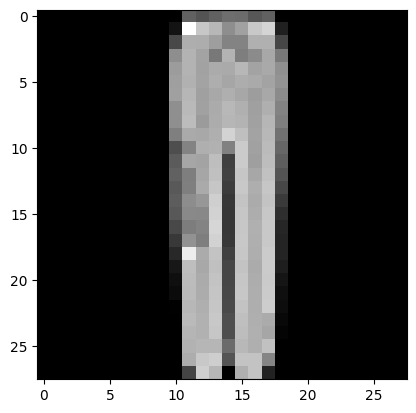

In [5]:
plt.imshow(train_images[1000], cmap="gray")
plt.show

In [6]:
print(train_labels[0])

9


In [8]:
#normalize to be between 0 and 1
#values are out of 255
#are all nparray
test_images, train_images = test_images/255.0, train_images/255.0

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [9]:
train_images.shape

(60000, 28, 28, 1)

In [10]:
test_images.shape

(10000, 28, 28, 1)

In [119]:
model = models.Sequential()
model.add(layers.Conv2D(64, (2, 2), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (2, 2), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [120]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [121]:
trained_cnn = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.0988 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0991 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0988 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.0988 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.0988 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026


In [ ]:
model.save('fashion_mnist_model.h5')